# Data Mining : Microarray Preprocessing

## Import Packages and Dataset

***Packages***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import accuracy_score

from ReliefF import ReliefF
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from yellowbrick.features.pca import PCADecomposition


import warnings
warnings.filterwarnings('ignore')

***Dataset***

In [2]:
data = pd.read_csv("data/colonTumor.csv")
data_length = data.shape[1]
data_length

2001

In [3]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [4]:
data = pd.read_csv("data/colonTumor.csv", header=None, names=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,atribut2000
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [5]:
data = data.rename(columns={'atribut2000': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [6]:
data.loc[data['status'] == 'negative', ['status']] = 0
data.loc[data['status'] == 'positive', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,0
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,1
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,0
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,1
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,0


In [7]:
data = data.apply(pd.to_numeric)

## Data Analysis

**Perbandingan jumlah positive dan negative**

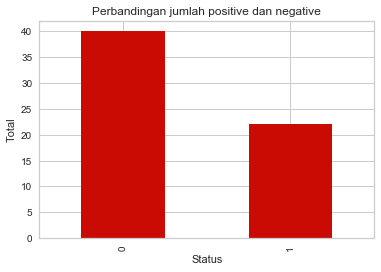

In [8]:
data['status'].value_counts().plot(kind='bar', color="r")
plt.title("Perbandingan jumlah positive dan negative")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

**statistic info**

In [9]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,7015.786710,4966.960015,4094.727879,3987.789284,2937.126113,4705.119302,3588.800323,2872.288631,4680.191160,4039.661953,...,100.227903,293.222722,124.653387,133.186935,184.136635,84.118387,114.930000,53.251230,42.965827,0.354839
std,3092.970584,2188.890480,1818.080939,2019.086903,1356.932887,2400.848112,1872.106095,1122.365448,2417.239217,2018.044248,...,78.022712,179.249194,75.535838,101.372557,159.914871,86.182028,88.011866,38.462814,28.395175,0.482370
min,1914.677500,1383.488600,1269.648700,1186.030400,1166.553600,1087.750000,1062.697500,1026.477500,995.790000,974.815480,...,5.935000,5.925000,5.923750,5.916250,5.888095,5.878750,5.848750,5.842500,5.816250,0.000000
25%,4877.364700,3408.951150,2763.725900,2648.942875,1890.857125,2843.368775,2112.952150,2050.814025,2971.792775,2797.992525,...,48.409375,161.518125,69.121250,71.637500,85.905059,30.701875,53.881563,27.334375,24.610000,0.000000
50%,6274.612500,4738.280700,3890.338100,3451.498200,2666.075600,4416.617850,3438.180000,2844.960650,4088.735600,3823.017900,...,83.080625,251.883125,114.658125,104.271875,142.578570,56.385625,93.825625,45.358125,34.775000,0.000000
75%,8712.283175,6455.843200,5008.993750,4738.408950,3563.969325,6076.032125,4420.645350,3414.228475,6171.382800,4840.715500,...,117.208438,424.742500,177.730312,149.772188,212.019940,101.231250,145.074062,66.235312,54.697500,1.000000
max,14876.407000,10152.273000,8605.043800,11248.680000,8093.875000,11222.682000,9939.246200,5917.026300,14144.835000,12307.913000,...,438.383750,902.572500,333.418750,464.930000,702.130950,405.600000,390.890000,197.220000,126.826250,1.000000


## Features Target Split

In [10]:
X = data.drop(['status'],axis=1)
y = data['status']

## Normalization

In [11]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_minmax = scaler.fit_transform(X_train_)
    X_train_ = pd.DataFrame(X_train_minmax, columns=X_train_.columns)
    X_test_minmax = scaler.transform(X_test_)
    X_test_ = pd.DataFrame(X_test_minmax, columns=X_test_.columns)
    return X_train_,X_test_

## Feature Selection

### Clustering (K-Means)

In [12]:
def k_means(X_train_):
    X_train_transpose = X_train_.transpose()
    model_kme = KMeans(n_clusters= 6)
    model_kme.fit(X_train_transpose)
    pred_kme = model_kme.predict(X_train_transpose)
    X_train_transpose_clustered = X_train_transpose.copy()
    X_train_transpose_clustered['cluster'] = pred_kme 
    return X_train_transpose_clustered

### Relief Method

In [13]:
def find_column(data_, data_selected, num_features_selected, left_columns):
    for i in data_.columns:
        if ((data_[i].values.tolist() == data_selected.iloc[:,num_features_selected].values.tolist()) and (i not in left_columns)):
            column = i
            break
    return column

In [14]:
def relief_method(X_train_transpose_clusteredx, X_train_,y_train_, label_cluster):
    n_features_to_keep = 8
    n_neighbors = X_train_.shape[0]-1
    Train = pd.DataFrame()
    for i in label_cluster:
        X_train_transpose_clustered_ = X_train_transpose_clusteredx[X_train_transpose_clusteredx['cluster']==i]
        X_train_clustered_ = X_train_transpose_clustered_.drop(['cluster'],axis=1).transpose()
        fs = ReliefF(n_neighbors=n_neighbors, n_features_to_keep=n_features_to_keep)
        X_train_selected = fs.fit_transform(X_train_clustered_.values, y_train_)
        top_features = fs.top_features[0:n_features_to_keep]
        for j in top_features:
            if Train.shape == (0,0):
                Train = X_train_[[find_column(X_train_, X_train_clustered_, j,Train.columns)]]
            else:
                Train = Train.join(X_train_[[find_column(X_train_, X_train_clustered_, j,Train.columns)]])
    return Train

### Mutual information

In [15]:
def create_features_dict(data, mutual_info):
    dict = {}
    for i,j in zip(data.columns,mutual_info):
        dict[i] = j
    return dict

In [16]:
def mutual_information(X_train_transpose_clusteredx, X_train_,y_train_, label_cluster):
    n_features_to_keep = 8
    n_neighbors = X_train_.shape[0]-1
    Train = pd.DataFrame()
    for i in label_cluster:
        X_train_transpose_clustered_ = X_train_transpose_clusteredx[X_train_transpose_clusteredx['cluster']==i]
        X_train_clustered_ = X_train_transpose_clustered_.drop(['cluster'],axis=1).transpose()
        MI = mutual_info_classif(X_train_clustered_,y_train_,n_neighbors=n_neighbors)
        dict = create_features_dict(X_train_clustered_,MI)
        X_train_selected = sorted(dict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
        X_train_selected = X_train_selected[:n_features_to_keep]
        top_features = [i[0] for i in X_train_selected]
        for j in top_features:
            if Train.shape == (0,0):
                Train = X_train_[[j]]
            else:
                Train = Train.join(X_train_[[j]])
    return Train

### PCA

In [17]:
def pca(X_train_transpose_clusteredx, X_train_,y_train_, label_cluster):
    Train = pd.DataFrame()
    n_components = 1
    n_features_to_keep = 8
    for i in label_cluster:
        X_train_transpose_clustered_ = X_train_transpose_clusteredx[X_train_transpose_clusteredx['cluster']==i]
        X_train_clustered_ = X_train_transpose_clustered_.drop(['cluster'],axis=1).transpose()
        pca = PCA(n_components=n_components)
        ft = pca.fit_transform(X_train_clustered_)
        X_train_selected = pca.components_[0]
        dict = create_features_dict(X_train_clustered_,X_train_selected)
        X_train_selected = sorted(dict.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
        X_train_selected = X_train_selected[:n_features_to_keep]
        top_features = [i[0] for i in X_train_selected]
        for j in top_features:
            if Train.shape == (0,0):
                Train = X_train_[[j]]
            else:
                Train = Train.join(X_train_[[j]])
    return Train

## Prepare data

In [18]:
def prepare_data(Train_,X_test_):
    X_train_ = Train_.copy()
    X_test_ = X_test_[X_train_.columns]
    return X_train_,X_test_

## Classification

In [19]:
model_rfg = RandomForestClassifier(criterion='gini', n_estimators=60)
model_svm = SVC(kernel='linear')
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier()
model_mnb = MultinomialNB()

In [20]:
X_ = X.values
y_ = y.values

**K-fold Cross Validation**

In [21]:
kf = KFold(n_splits=8, random_state=20)
kf.get_n_splits(X_)

8

***Random Forest***

- Relief Method with clustering

In [22]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = relief_method(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_rfg.fit(X_train,y_train)
    pred = model_rfg.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Random Forest : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_rfg_RM = scoring.mean()
print("avg accuraccy = ",avg_rfg_RM)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Random Forest :  0.875
Score in Random Forest :  0.75
Score in Random Forest :  0.875
Score in Random Forest :  1.0
Score in Random Forest :  0.875
Score in Random Forest :  0.875
Score in Random Forest :  0.5714285714285714
Score in Random Forest :  0.8571428571428571
avg accuraccy =  0.8348214285714286
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


- Mutual Information with clustering

In [23]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = mutual_information(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_rfg.fit(X_train,y_train)
    pred = model_rfg.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Random Forest : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_rfg_MI = scoring.mean()
print("avg accuraccy = ",avg_rfg_MI)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Random Forest :  0.875
Score in Random Forest :  0.875
Score in Random Forest :  0.75
Score in Random Forest :  1.0
Score in Random Forest :  1.0
Score in Random Forest :  0.875
Score in Random Forest :  0.5714285714285714
Score in Random Forest :  0.7142857142857143
avg accuraccy =  0.8325892857142857
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


- PCA with clustering

In [24]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = pca(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_rfg.fit(X_train,y_train)
    pred = model_rfg.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Random Forest : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_rfg_PCA = scoring.mean()
print("avg accuraccy = ",avg_rfg_PCA)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Random Forest :  0.625
Score in Random Forest :  0.625
Score in Random Forest :  0.75
Score in Random Forest :  0.875
Score in Random Forest :  1.0
Score in Random Forest :  0.875
Score in Random Forest :  0.5714285714285714
Score in Random Forest :  0.7142857142857143
avg accuraccy =  0.7544642857142857
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


***Support Vector Machine***

- Relief Method with Clustering

In [25]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = relief_method(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_svm.fit(X_train,y_train)
    pred = model_svm.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in SVM : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_svm_RM = scoring.mean()
print("avg accuraccy = ",scoring.mean())
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in SVM :  0.75
Score in SVM :  0.75
Score in SVM :  0.5
Score in SVM :  1.0
Score in SVM :  1.0
Score in SVM :  0.875
Score in SVM :  0.5714285714285714
Score in SVM :  0.8571428571428571
avg accuraccy =  0.7879464285714286
max accuraccy =  1.0
min accuraccy =  0.5


- Mutual information with clustering

In [26]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = mutual_information(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_svm.fit(X_train,y_train)
    pred = model_svm.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in SVM : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_svm_MI = scoring.mean()
print("avg accuraccy = ",scoring.mean())
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in SVM :  0.875
Score in SVM :  0.875
Score in SVM :  1.0
Score in SVM :  1.0
Score in SVM :  1.0
Score in SVM :  0.75
Score in SVM :  0.5714285714285714
Score in SVM :  0.7142857142857143
avg accuraccy =  0.8482142857142857
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


- PCA with clustering

In [41]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = pca(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_svm.fit(X_train,y_train)
    pred = model_svm.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in SVM : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_svm_PCA = scoring.mean()
print("avg accuraccy = ",scoring.mean())
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in SVM :  0.625
Score in SVM :  0.625
Score in SVM :  0.625
Score in SVM :  0.875
Score in SVM :  1.0
Score in SVM :  0.875
Score in SVM :  0.5714285714285714
Score in SVM :  0.8571428571428571
avg accuraccy =  0.7566964285714286
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


***Logistic Regression***

- Relief Method with clustering

In [28]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = relief_method(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_lr.fit(X_train,y_train)
    pred = model_lr.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Logistic Regression : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_lr_RM = scoring.mean()
print("avg accuraccy = ",avg_lr_RM)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Logistic Regression :  0.75
Score in Logistic Regression :  0.625
Score in Logistic Regression :  0.75
Score in Logistic Regression :  1.0
Score in Logistic Regression :  0.875
Score in Logistic Regression :  1.0
Score in Logistic Regression :  0.5714285714285714
Score in Logistic Regression :  0.7142857142857143
avg accuraccy =  0.7857142857142857
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


- Mutual Information with clustering

In [29]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = mutual_information(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_lr.fit(X_train,y_train)
    pred = model_lr.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Logistic Regression : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_lr_MI = scoring.mean()
print("avg accuraccy = ",avg_lr_MI)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Logistic Regression :  0.875
Score in Logistic Regression :  0.875
Score in Logistic Regression :  1.0
Score in Logistic Regression :  1.0
Score in Logistic Regression :  1.0
Score in Logistic Regression :  0.875
Score in Logistic Regression :  0.5714285714285714
Score in Logistic Regression :  0.7142857142857143
avg accuraccy =  0.8638392857142857
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


- PCA with clustering

In [30]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = pca(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_lr.fit(X_train,y_train)
    pred = model_lr.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Logistic Regression : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_lr_PCA = scoring.mean()
print("avg accuraccy = ",avg_lr_PCA)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Logistic Regression :  0.75
Score in Logistic Regression :  0.625
Score in Logistic Regression :  0.625
Score in Logistic Regression :  1.0
Score in Logistic Regression :  1.0
Score in Logistic Regression :  0.875
Score in Logistic Regression :  0.5714285714285714
Score in Logistic Regression :  0.7142857142857143
avg accuraccy =  0.7700892857142857
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


***K nearest neighbors***

- relief method with clustering

In [31]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = relief_method(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_knn.fit(X_train,y_train)
    pred = model_knn.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in KNN : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_knn_RM = scoring.mean()
print("avg accuraccy = ",avg_knn_RM)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in KNN :  0.75
Score in KNN :  0.625
Score in KNN :  0.75
Score in KNN :  0.625
Score in KNN :  0.875
Score in KNN :  0.875
Score in KNN :  0.5714285714285714
Score in KNN :  1.0
avg accuraccy =  0.7589285714285714
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


- mutual information with clustering

In [32]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = mutual_information(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_knn.fit(X_train,y_train)
    pred = model_knn.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in KNN : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_knn_MI = scoring.mean()
print("avg accuraccy = ",avg_knn_MI)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in KNN :  0.75
Score in KNN :  0.875
Score in KNN :  0.75
Score in KNN :  1.0
Score in KNN :  1.0
Score in KNN :  0.75
Score in KNN :  0.5714285714285714
Score in KNN :  0.7142857142857143
avg accuraccy =  0.8013392857142857
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


- PCA with clustering

In [33]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = pca(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_knn.fit(X_train,y_train)
    pred = model_knn.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in KNN : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_knn_PCA = scoring.mean()
print("avg accuraccy = ",avg_knn_PCA)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in KNN :  0.75
Score in KNN :  0.375
Score in KNN :  0.75
Score in KNN :  0.875
Score in KNN :  0.75
Score in KNN :  1.0
Score in KNN :  0.7142857142857143
Score in KNN :  0.5714285714285714
avg accuraccy =  0.7232142857142857
max accuraccy =  1.0
min accuraccy =  0.375


***Multinomial naive bayes***

- relief method with clustering

In [34]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = relief_method(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_mnb.fit(X_train,y_train)
    pred = model_mnb.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Multinomial Naive Bayes : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_mnb_RM = scoring.mean()
print("avg accuraccy = ",avg_mnb_RM)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Multinomial Naive Bayes :  0.625
Score in Multinomial Naive Bayes :  0.5
Score in Multinomial Naive Bayes :  0.625
Score in Multinomial Naive Bayes :  1.0
Score in Multinomial Naive Bayes :  0.875
Score in Multinomial Naive Bayes :  0.875
Score in Multinomial Naive Bayes :  0.5714285714285714
Score in Multinomial Naive Bayes :  0.7142857142857143
avg accuraccy =  0.7232142857142857
max accuraccy =  1.0
min accuraccy =  0.5


- mutual information with clustering

In [35]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = mutual_information(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_mnb.fit(X_train,y_train)
    pred = model_mnb.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Multinomial Naive Bayes : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_mnb_MI = scoring.mean()
print("avg accuraccy = ",avg_mnb_MI)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Multinomial Naive Bayes :  1.0
Score in Multinomial Naive Bayes :  0.875
Score in Multinomial Naive Bayes :  0.875
Score in Multinomial Naive Bayes :  1.0
Score in Multinomial Naive Bayes :  1.0
Score in Multinomial Naive Bayes :  0.875
Score in Multinomial Naive Bayes :  0.5714285714285714
Score in Multinomial Naive Bayes :  0.8571428571428571
avg accuraccy =  0.8816964285714286
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


- PCA with clustering

In [36]:
print(kf)
scoring = []
for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    X_train, X_test = minmax_scaler(X_train, X_test)
    X_train_transpose_clustered = k_means(X_train)
    clusters = set(X_train_transpose_clustered['cluster'].values.tolist())
    Train = pca(X_train_transpose_clustered, X_train, y_train, clusters)
    X_train, X_test = prepare_data(Train,X_test)
    model_mnb.fit(X_train,y_train)
    pred = model_mnb.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Multinomial Naive Bayes : ", hasil)
    scoring.append(hasil)
scoring = np.array(scoring)
avg_mnb_PCA = scoring.mean()
print("avg accuraccy = ",avg_mnb_PCA)
print("max accuraccy = ",scoring.max())
print("min accuraccy = ",scoring.min())

KFold(n_splits=8, random_state=20, shuffle=False)
Score in Multinomial Naive Bayes :  0.625
Score in Multinomial Naive Bayes :  0.625
Score in Multinomial Naive Bayes :  0.625
Score in Multinomial Naive Bayes :  0.875
Score in Multinomial Naive Bayes :  1.0
Score in Multinomial Naive Bayes :  0.875
Score in Multinomial Naive Bayes :  0.5714285714285714
Score in Multinomial Naive Bayes :  0.7142857142857143
avg accuraccy =  0.7388392857142857
max accuraccy =  1.0
min accuraccy =  0.5714285714285714


## Result

In [50]:
result = pd.DataFrame({
    "method" : ["Random Forest","SVM","Logistic Regression","KNN","Multinomial Naive Bayes"],
    "Relief Method" : [avg_rfg_RM,avg_svm_RM,avg_lr_RM,avg_knn_RM,avg_mnb_RM],
    "Mutual Information" : [avg_rfg_MI,avg_svm_MI,avg_lr_MI,avg_knn_MI,avg_mnb_MI],
    "PCA" : [avg_rfg_PCA,avg_svm_PCA,avg_lr_PCA,avg_knn_PCA,avg_mnb_PCA]
})
result = result.set_index(['method'],drop=True)

In [51]:
result

,Relief Method,Mutual Information,PCA
method,,,
Random Forest,0.834821,0.832589,0.754464
SVM,0.787946,0.848214,0.756696
Logistic Regression,0.785714,0.863839,0.770089
KNN,0.758929,0.801339,0.723214
Multinomial Naive Bayes,0.723214,0.881696,0.738839


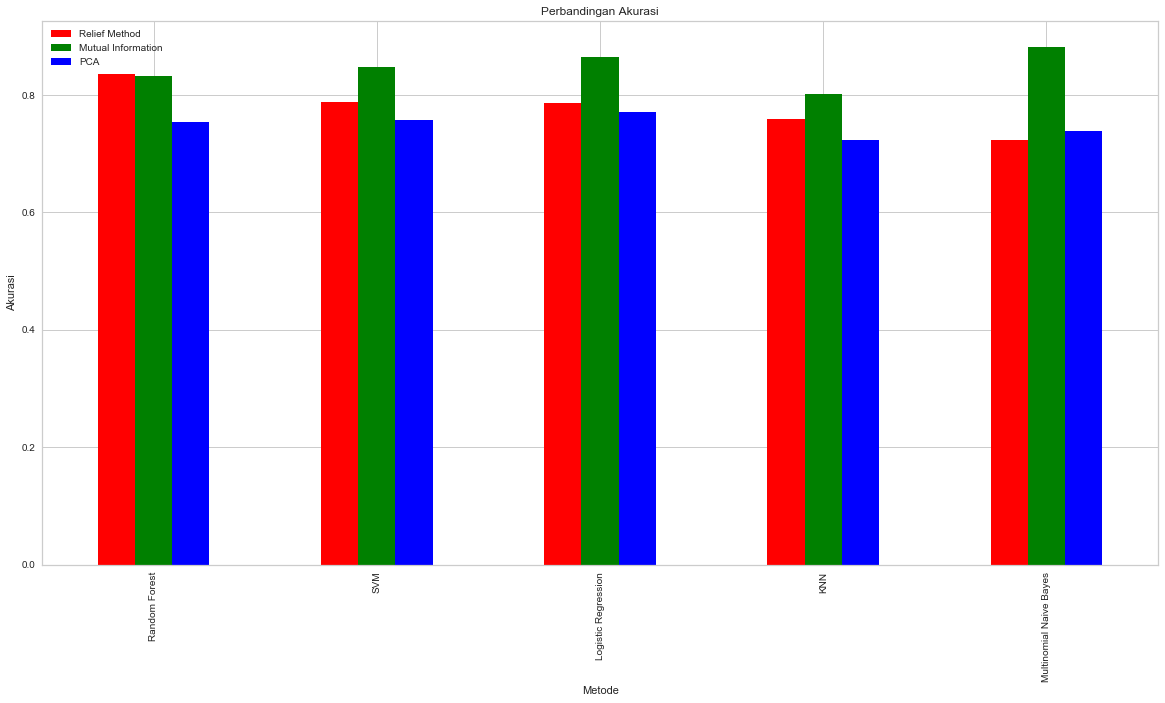

In [60]:
result.loc[:,['Relief Method','Mutual Information','PCA']].plot.bar(color=['red','green','blue'], figsize=(20,10))
plt.title("Perbandingan Akurasi")
plt.xlabel('Metode')
plt.ylabel('Akurasi')
plt.show()